In [4]:
import numpy as np

In [14]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]

In [15]:
len(x_vec)

100

In [16]:
y_vec = np.random.randn(len(x_vec))

In [18]:
y_vec

array([ 0.40111612, -0.38183098,  0.67976665,  0.24844438,  2.22678687,
        0.85091205,  1.18287374,  0.99563507, -0.61984879, -0.50837984,
        0.13749208,  0.46542603,  1.08191834,  0.45711584, -0.71369928,
        1.06902741,  1.36717715,  0.08854069,  0.88954665,  0.39202937,
        0.52781505, -1.2736529 , -0.13868885,  0.43621371, -0.01790371,
        1.11131171,  0.39250185, -0.33045204,  0.45656647, -0.44448411,
        2.4881342 , -1.87084755, -0.54991704, -0.69056224,  0.97634669,
       -0.26649213,  0.09566364, -0.14830734,  0.04384859, -1.22586721,
       -0.1208099 ,  1.11197372,  0.2763258 , -1.78457852, -0.1057854 ,
       -0.598141  ,  1.95608347,  0.82545155, -0.78655686, -1.10521585,
        0.01107494,  0.35015946, -0.12991373, -0.54500306, -0.97834395,
        1.44943989,  0.28828842,  0.31871697,  0.2530194 ,  2.04520291,
        1.781533  , -1.48152093,  1.36556135, -1.29574512,  0.44969701,
       -0.25879445,  0.22054545, -0.01756099, -0.89193072,  1.28

In [3]:
size = 100
x_vec = np.linspace(0,1,size+1)[0:-1]
y_vec = np.random.randn(len(x_vec))
line1 = []
while True:
    rand_val = np.random.randn(1)
    y_vec[-1] = rand_val
    line1 = live_plotter(x_vec,y_vec,line1)
    y_vec = np.append(y_vec[1:],0.0)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

class LivePlotNotebook(object):
    """
    Live plot using %matplotlib notebook in jupyter notebook
    
    Usage:
    ```
    import time
    liveplot = LivePlotNotebook()
    x=np.random.random((10,))
    for i in range(10):
        time.sleep(1)
        liveplot.update(
            x=x+np.random.random(x.shape)/10,
            actions=np.random.randint(0, 3, size=(10,))
        )
    ```
    
    url:
    """

    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1)
        
        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')
        
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')
        
        self.ax = ax
        self.fig = fig

    def update(self, x, actions):             
        # update price
        line = self.ax.lines[0]
        line.set_xdata(range(len(x)))
        line.set_ydata(x)
        
        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
        self.ax.set_xlim(0, len(actions))
        self.ax.set_ylim(x.min(), x.max())

        self.fig.canvas.draw()
        

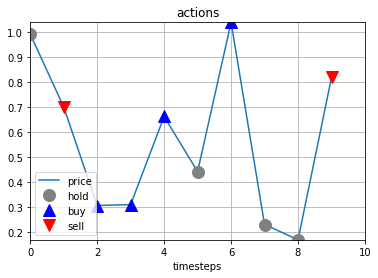

In [2]:
# Test
import time
liveplot = LivePlotNotebook()
x=np.random.random((10,))
for i in range(10):
    time.sleep(1)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,)))